# Quadratic London
#### Analysis of data collected from governance experiment. Overview of project can be found by reading the gitbook - https://quadratic-london.gitbook.io/quadratic-london
#### This notebook is for portfolio purposes, for detailed project overview with annotation and discussion points please see the results page in the gitbook.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('ql_sheets.csv')


# Data cleaning
#### The data was collected by myself, I wanted to mitigate cleaning by planning in advance. To find out how the data was collected please refer to the projects gitbook. 

In [3]:
# remove columns not pertinent or private.
remove_col = df.drop(columns=[df.columns[0], df.columns[2], df.columns[10],df.columns[17]])


In [4]:
# reduce column labels to manageable length
rename_dict = {
    
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'Do you have prior knowledge of quadratic voting? ': 'prior_qv_knowledge',
    'Do you believe there should be alternative forms of governance for making societal decisions?  ': 'alt_governance',
    'Would you participate in voting more frequently if there were infrastructure, such as an app, to facilitate it?  ': 'vote_more_often',
    'How many times per year would you be willing to vote on issues affecting your community, factoring the time needed to read policies and cast your vote?  ': 'annual_votes',
    'How politically active are you?\n(1 being no activity and 5 being very active)': 'political_activity',
    '1. Youth Empowerment and Mentorship Program\nType: Prevention\n': 'youth_empowerment',
    '2. Community Safety and Policing Reform Initiative\nType: Resolution \n': 'community_safety',
    '3. Mental Health Support and Counselling Services Expansion\nType: Prevention\n': 'mental_health_support',
    '4. Education and Outreach Campaign on Conflict Resolution\nType: Resolution\n': 'conflict_resolution_education',
    '5. Rehabilitation and Reintegration Program for Former Offenders \nType: Resolution \n': 'offender_rehabilitation',
    '6. School and Community Programs to Reduce Substance Abuse\nType: Prevention\n': 'substance_abuse_prevention'
}

column_clean = remove_col.rename(columns=rename_dict)
column_clean

# anonymise participants name into voter id
cols_cleaned = column_clean.rename(columns={column_clean.columns[0]: 'voter_id'})
cols_cleaned['voter_id'] = range(1, len(cols_cleaned) + 1)


# mean of the 'political_activity' column, excluding NaN values
mean_value = cols_cleaned['political_activity'].dropna().astype(float).mean()

# Fill NaN value in 'political_activity' column with the mean value
cols_cleaned['political_activity'] = cols_cleaned['political_activity'].fillna(mean_value)
cols_cleaned
# Round values in 'political_activity' and convert to integers
cols_cleaned['political_activity'] = cols_cleaned['political_activity'].astype(float).round().astype(int)
qv_clean = cols_cleaned.copy() # manually checked they round true to float.


In [5]:
output_file_path = 'qv_cleaned.csv'           # creat clean csv and import
qv_clean.to_csv(output_file_path, index=False)


#### Font selection

In [6]:
font_path = 'BergenText-Regular.otf'

# Add to Matplotlib
bergen = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = bergen.get_name()

### Graphs showing distribution of age and gender numbers across total participants

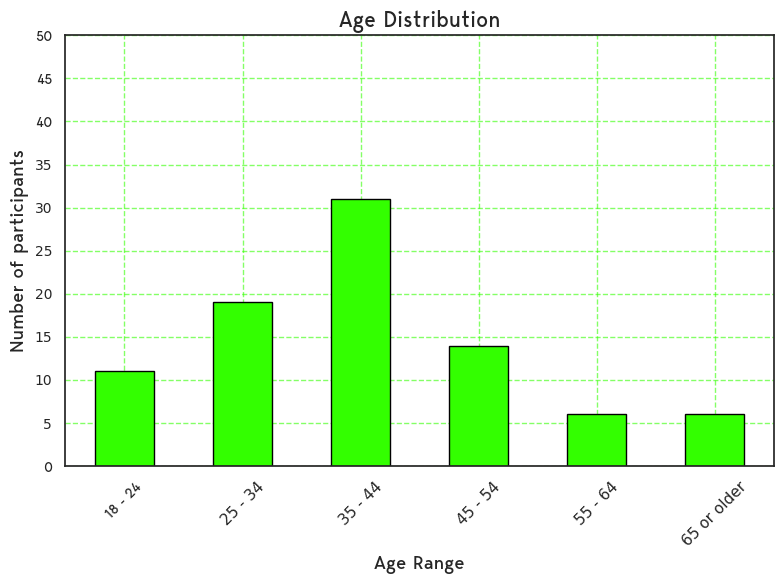

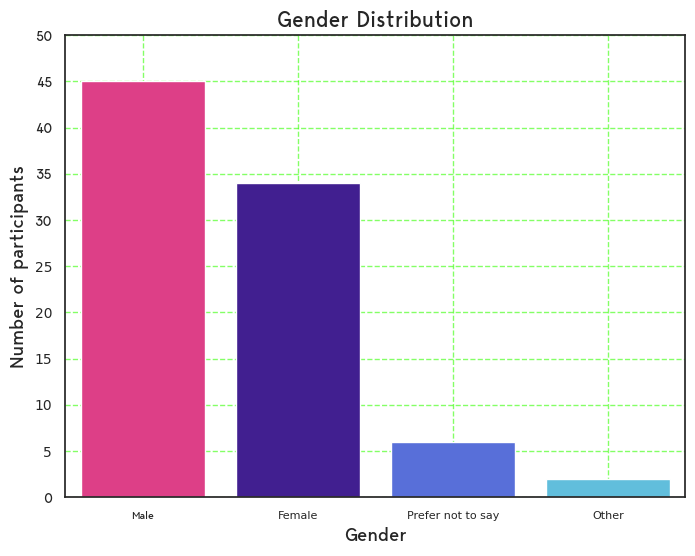

In [7]:

# seaborn style and palette
sns.set(style="white")
acid_green = sns.color_palette(["#F72585", "#3A0CA3", "#4361EE", "#4CC9F0"])
palette = ["#24ff20", "#ccff33", "#9ef01a", "#70e000"]


# order for age ranges
age_ranges = ['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 or older']
age_counts = qv_clean['age'].value_counts()

# bar chart plot for age range
plt.figure(figsize=(8, 6))
age_counts.loc[age_ranges].plot(kind='bar', color='#33ff00', edgecolor='black')
plt.title('Age Distribution', fontsize=16, fontproperties=bergen, weight='bold')
plt.xlabel('Age Range', fontsize=14, fontproperties=bergen)
plt.ylabel('Number of participants', fontsize=14,fontproperties=bergen)
plt.xticks(rotation=45, fontproperties=bergen)
plt.yticks(fontsize=10, fontproperties=bergen)
plt.ylim(0, age_counts.max() + 5)  
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#33ff00')
plt.grid(axis='x', linestyle='--', alpha=0.7, color='#33ff00')
plt.yticks(range(0, age_counts.max() + 20, 5))
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

# bar chart plot for gender
plt.figure(figsize=(8, 6))
gender_counts = qv_clean['gender'].value_counts().sort_values(ascending=False)
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=acid_green)
plt.title('Gender Distribution', fontsize=16, fontproperties=bergen, weight='bold')
plt.xlabel('Gender', fontsize=14, fontproperties=bergen)
plt.ylabel('Number of participants', fontsize=14, fontproperties=bergen)
plt.xticks(fontsize=8, fontproperties=bergen)
plt.yticks(fontsize=10, fontproperties=bergen)
plt.yticks(range(0, age_counts.max() + 20, 5))  
plt.grid(axis='y', linestyle='--', alpha=0.9, color='#33ff00')
plt.grid(axis='x', linestyle='--', alpha=0.9, color='#33ff00')
plt.grid(True, alpha=0.6)
plt.show()


In [8]:
palette = ["#24ff20", "#ccff33", "#9ef01a", "#70e000"]

### Boxplot looking at people with prior knowledge of quadratic voting and the amount they would vote per year should they or should not believe in alternative forms of governance.

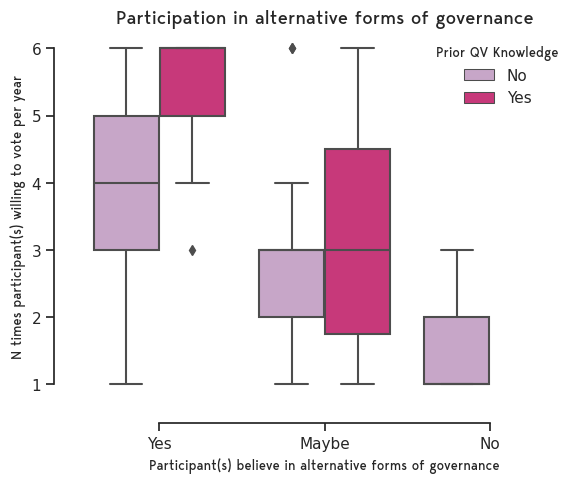

In [9]:
# seaborn box and whisker plotm 
sns.set_theme(style="ticks", palette=palette)
sns.boxplot(x="alt_governance", y="annual_votes",
            hue="prior_qv_knowledge", palette='PuRd',
            data=qv_clean)
plt.title("Participation in alternative forms of governance", fontsize=14, fontproperties=bergen, weight='bold')
plt.xlabel("Participant(s) believe in alternative forms of governance", fontsize=10, fontproperties=bergen)
plt.ylabel("N times participant(s) willing to vote per year", fontsize=10, fontproperties=bergen)
plt.xticks(fontsize=8, fontproperties=bergen)
plt.yticks(fontsize=10, fontproperties=bergen)


legend = plt.legend(title="Prior QV Knowledge", loc='upper right', frameon=False)
plt.setp(legend.get_title(), fontproperties=bergen)
sns.despine(offset=16, trim=True)

### Heatmap looking for correlation between participants self ascribed political activity and willingness to vote.

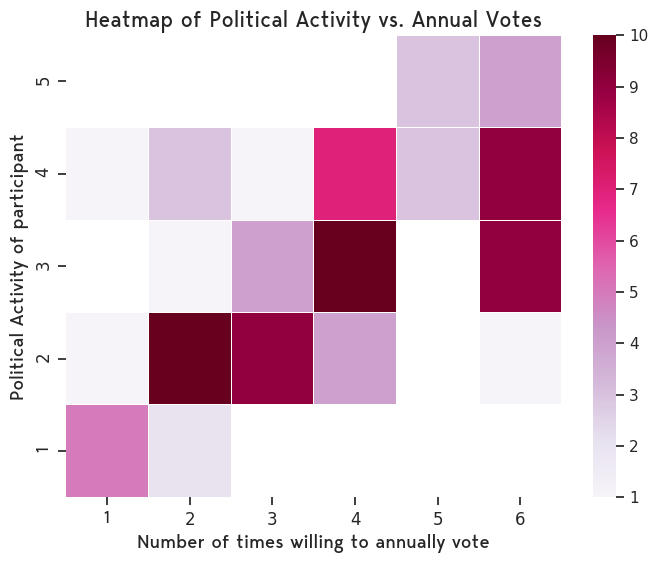

In [10]:
# seaborn heatmap, looking for correlation between political activity and willingness to vote
plt.figure(figsize=(8, 6))
heatmap_data = qv_clean.groupby(['political_activity', 'annual_votes']).size().reset_index(name='counts')
heatmap_data_pivot = heatmap_data.pivot('political_activity', 'annual_votes', 'counts')
heatmap_data_pivot = heatmap_data_pivot.reindex(index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5, 6], fill_value=0)

sns.heatmap(heatmap_data_pivot, annot=False, cmap='PuRd', cbar=True, linewidths=.005, linecolor='white')

# flip y axis index whilst preserving data
plt.gca().invert_yaxis()


plt.title("Heatmap of Political Activity vs. Annual Votes", fontsize=16, fontproperties=bergen)
plt.xlabel("Number of times willing to annually vote", fontsize=14, fontproperties=bergen)
plt.ylabel("Political Activity of participant", fontsize=14, fontproperties=bergen)
plt.xticks(fontsize=12, fontproperties=bergen)
plt.yticks(fontsize=12, fontproperties=bergen)
plt.show()

## Results from traditional plurality voting, in ranked order.

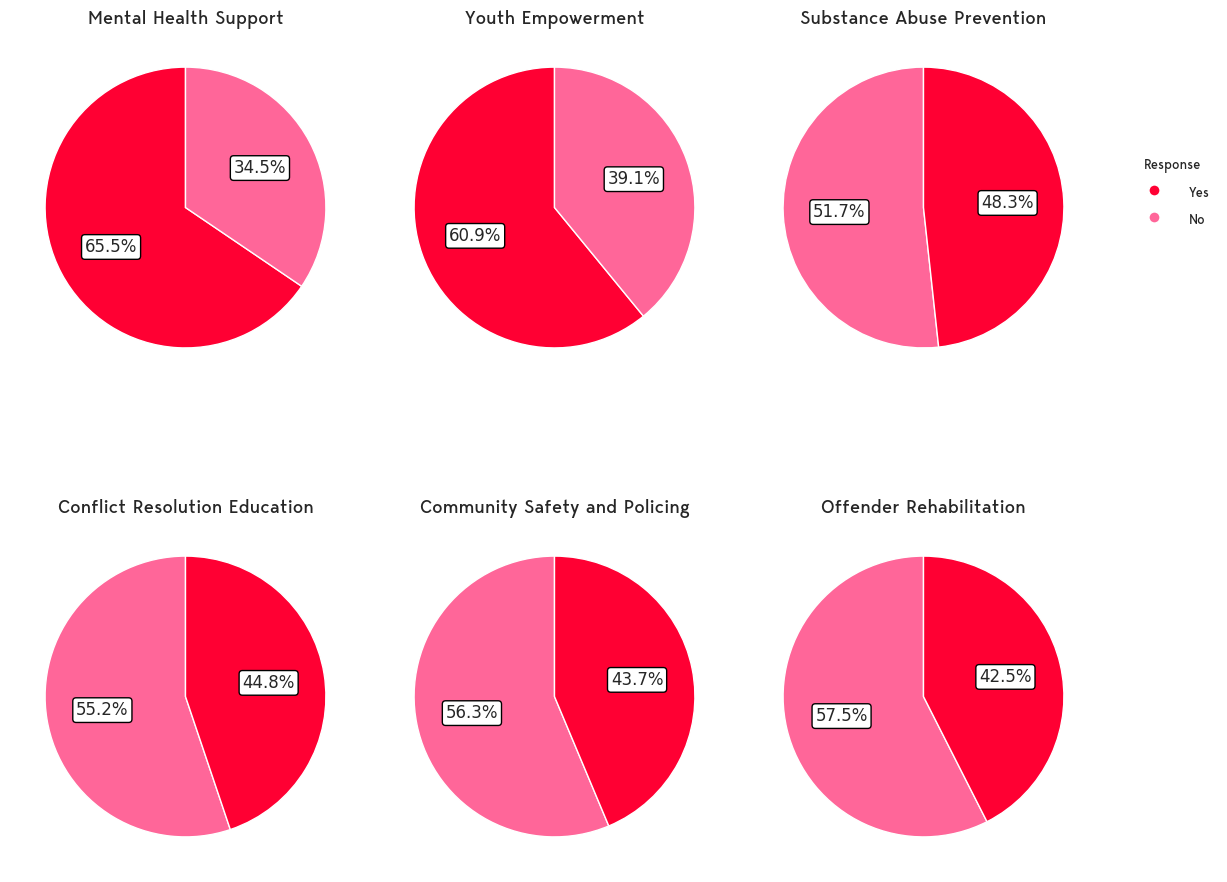

In [11]:

qv_clean_polls = qv_clean[['youth_empowerment','community_safety','mental_health_support',
                           'conflict_resolution_education', 'offender_rehabilitation','substance_abuse_prevention']]

# percentage of 'Yes' responses for pie charts
yes_percentages = qv_clean_polls.apply(lambda x: (x == 'Yes').mean() * 100)
sorted_columns = yes_percentages.sort_values(ascending=False).index

# titles for piue charts
titles = {
    'youth_empowerment': 'Youth Empowerment',
    'community_safety': 'Community Safety and Policing',
    'mental_health_support': 'Mental Health Support',
    'conflict_resolution_education': 'Conflict Resolution Education',
    'offender_rehabilitation': 'Offender Rehabilitation',
    'substance_abuse_prevention': 'Substance Abuse Prevention'
}


colors = {'Yes': '#ff0033', 'No': '#ff6699'}

# number of plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # amount
axes = axs.flatten()

#  pie charts for each sorted column from above
for i, column in enumerate(sorted_columns):
    counts = qv_clean_polls[column].value_counts()
    wedges, texts, autotexts = axes[i].pie(counts,
                                           autopct='%1.1f%%',  # percentage labels
                                           colors=[colors.get(label, '#d3d3d3') for label in counts.index],
                                           startangle=90)
# add white background to stand out percentages
    for autotext in autotexts:
        autotext.set_bbox(dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

    
    axes[i].set_title(titles[column], fontsize=14, fontproperties=bergen)

#  legend outside the plots
legend_labels = list(colors.keys())
legend_colors = [colors[label] for label in legend_labels]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label) 
           for color, label in zip(legend_colors, legend_labels)]

# add legend
legend = fig.legend(handles=handles, title="Response", loc="center left", bbox_to_anchor=(0.75, 0.75), fontsize=14, title_fontsize='15', frameon=False)
for text in legend.get_texts():
    text.set_fontproperties(bergen)

legend.get_title().set_fontproperties(bergen)

# layout adjustments
plt.tight_layout(rect=[0, 0, 0.75, 1]) 

plt.show()

## What project did each age group vote yes and no for? 

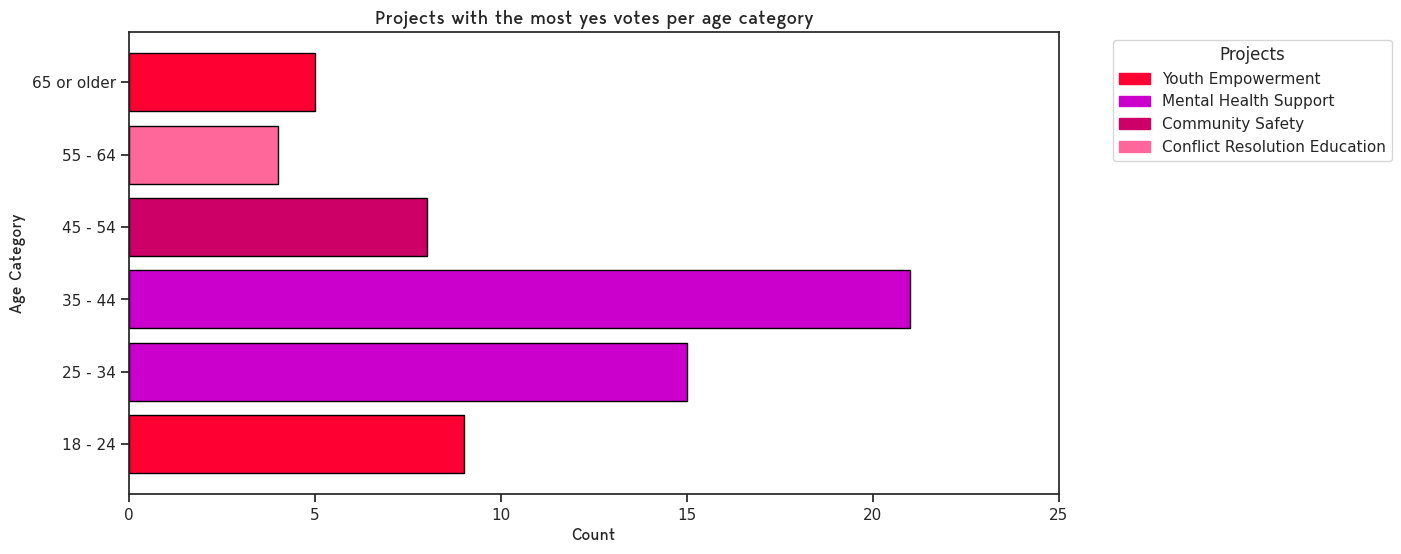

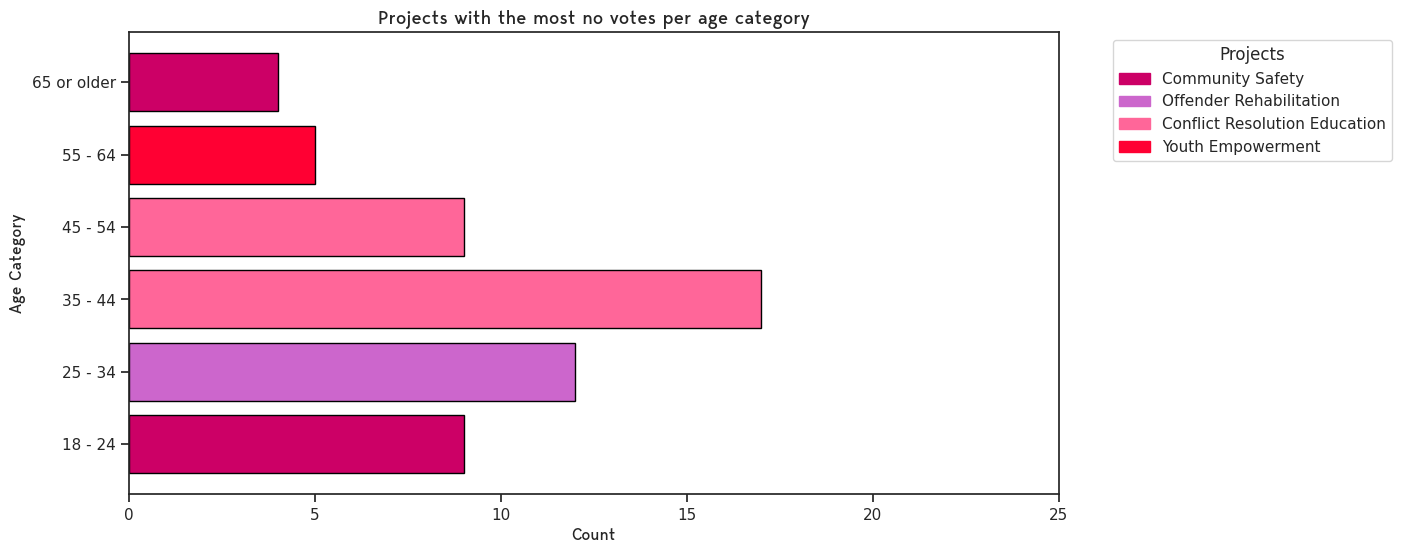

In [12]:

poll_columns = ['youth_empowerment', 'community_safety', 'mental_health_support',
                'conflict_resolution_education', 'offender_rehabilitation',
                'substance_abuse_prevention']

# convert yes and no to numeric
qv_clean_numeric = qv_clean.copy()
for column in poll_columns:
    qv_clean_numeric[column + '_yes'] = qv_clean_numeric[column].map({'Yes': 1, 'No': 0})
    qv_clean_numeric[column + '_no'] = qv_clean_numeric[column].map({'Yes': 0, 'No': 1})

# group age by yes and no votes
age_grouped_yes = qv_clean_numeric.groupby('age')[[col + '_yes' for col in poll_columns]].sum()
age_grouped_no = qv_clean_numeric.groupby('age')[[col + '_no' for col in poll_columns]].sum()

# locate max yesand no's for poll name and number of each yes no corresponding
max_yes_polls = age_grouped_yes.idxmax(axis=1)
max_yes_counts = age_grouped_yes.max(axis=1)
max_no_polls = age_grouped_no.idxmax(axis=1)
max_no_counts = age_grouped_no.max(axis=1)

# two seperate dataframes for seperate bar charts
result_yes = pd.DataFrame({
    'age': max_yes_polls.index,
    'most_yes_voted_poll': max_yes_polls.values,
    'yes_count': max_yes_counts.values
})

result_no = pd.DataFrame({
    'age': max_no_polls.index,
    'most_no_voted_poll': max_no_polls.values,
    'no_count': max_no_counts.values
})




# barh function
def plot_horizontal_bar_chart(df, count_column, title, xlabel, ylabel, legend_title):
    plt.figure(figsize=(12, 6))
    colors = [poll_colors[poll] for poll in df[legend_title]]
    bars = plt.barh(df['age'], df[count_column], color=colors, edgecolor='black')
    plt.xlabel(xlabel, fontsize=12, fontproperties=bergen)
    plt.ylabel(ylabel, fontsize=12, fontproperties=bergen)
    plt.title(title, fontsize=14, fontproperties=bergen)
    plt.xlim(0, 25)  
    plt.xticks(range(0, 26, 5))  

# legend without duplicating project names

    unique_polls = df[legend_title].unique()
    handles = [plt.Rectangle((0,0),1,1, color=poll_colors[poll]) for poll in unique_polls]
    labels = [poll.replace('_yes', '').replace('_no', '').replace('_', ' ').title() for poll in unique_polls]
    plt.legend(handles, labels, title='Projects'.title(), bbox_to_anchor=(1.05, 1), loc='upper left')

for text in legend.get_texts():
    text.set_fontproperties(bergen)

legend.get_title().set_fontproperties(bergen)


poll_colors = {
    'youth_empowerment_yes': '#ff0033',
    'community_safety_yes': '#cc0066',
    'mental_health_support_yes': '#cc00cc',
    'conflict_resolution_education_yes': '#ff6699',
    'offender_rehabilitation_yes': '#cc66cc',
    'substance_abuse_prevention_yes': 'lightblue',
    'youth_empowerment_no': '#ff0033',
    'community_safety_no': '#cc0066',
    'mental_health_support_no': '#cc00cc',
    'conflict_resolution_education_no': '#ff6699',
    'offender_rehabilitation_no': '#cc66cc',
    'substance_abuse_prevention_no': 'dodgerblue'}

# most yes votes
plot_horizontal_bar_chart(result_yes, 'yes_count', 'Projects with the most yes votes per age category', 'Count', 'Age Category', 'most_yes_voted_poll')

# most no votes
plot_horizontal_bar_chart(result_no, 'no_count', 'Projects with the most no votes per age category', 'Count', 'Age Category', 'most_no_voted_poll')

## Upload and clean quadratic voting results

In [13]:
# upload quadratic voting results
qv_results = pd.read_csv('qv_results_csv.csv')
qv_results

,title,votes
0,mental_health_support,382
1,substance_abuse_prevention,285
2,youth_empowerment,262
3,offender_rehabilitation,207
4,conflict_resolution_education,189
5,community_safety_and_policing,-11


In [14]:
titles = {
    'youth_empowerment': 'Youth Empowerment',
    'community_safety_and_policing': 'Community Safety and Policing',
    'mental_health_support': 'Mental Health Support',
    'conflict_resolution_education': 'Conflict Resolution Education',
    'offender_rehabilitation': 'Offender Rehabilitation',
    'substance_abuse_prevention': 'Substance Abuse Prevention'
}

# qv_results['title'].unique())

qv_results_updated = qv_results.copy()
qv_results_updated['title'] = qv_results_updated['title'].map(titles)



## Quadratic Voting results
#### I have written a short analysis on the outcome between traditional and quadratic voting in the gitbook results section

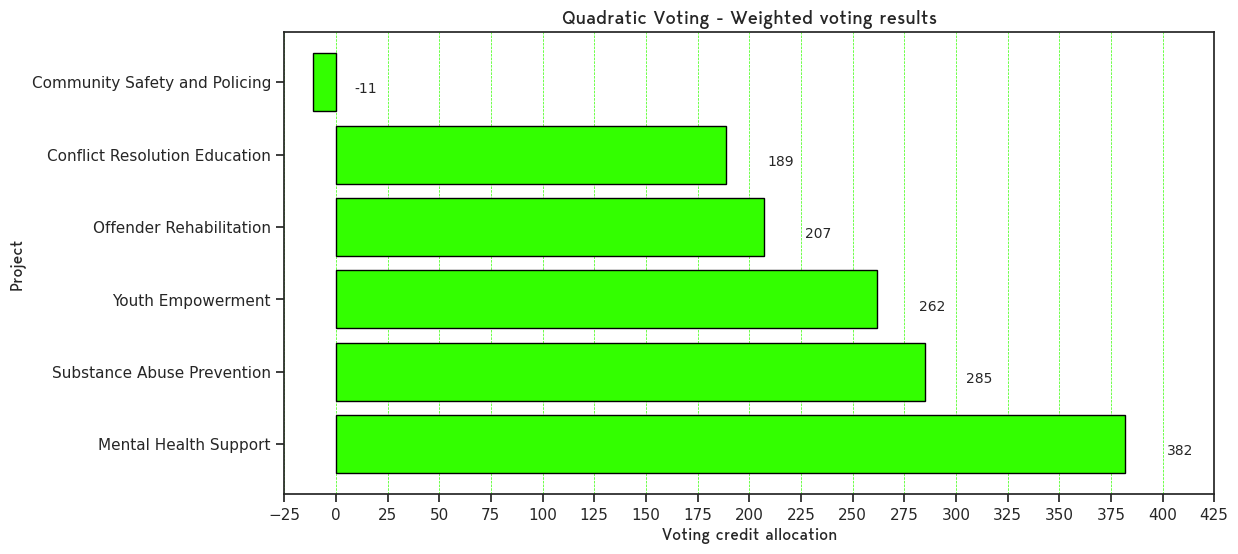

In [15]:
# use previous function for barh of QV results
def plot_horizontal_bar_chart(df, count_column, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    
    bars = plt.barh(df['title'], df[count_column], color='#33ff00', edgecolor='black')
    plt.xlabel(xlabel, fontsize=12, fontproperties=bergen)
    plt.ylabel(ylabel, fontsize=12, fontproperties=bergen)
    plt.title(title, fontsize=14, fontproperties=bergen)
    plt.xlim(-25, 425)  
    plt.xticks(range(-25, 426, 25))  
    
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='#33ff00', axis='x', alpha=1) # add grid
    # add values for each project
    for bar in bars:
        plt.text(bar.get_width() + 20, bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='top', ha='left', fontsize=10)
    


plot_horizontal_bar_chart(qv_results_updated, 'votes', 'Quadratic Voting - Weighted voting results', 'Voting credit allocation', 'Project')

plt.show()